# Setup

In [1]:
from seligator.training.trainer import run_training_loop
from seligator.models import baseline
from seligator.evaluate import run_tests
from seligator.common.constants import BERT_DIR
import tabulate

NB_EPOCHS = 20
PATIENCE = 5
BATCHES_PER_EPOCH = 20

Results = []


def get_table(scores):
    return tabulate.tabulate([list(scores.values())], headers=(scores.keys()), tablefmt="html", floatfmt=".2f")


def multiple_run(build_model, use_only, name: str, ratio_ranges=[.1, .5, 1.0]):
    models, readers = [], []
    for ratio in ratio_ranges:
        model, dataset_reader = run_training_loop(
            build_model=build_model,
            cuda_device=0,
            use_only=use_only,
            ratio_train=ratio,
            num_epochs=NB_EPOCHS, patience=PATIENCE,
            batches_per_epoch=BATCHES_PER_EPOCH*4 if "token_subword" in use_only else BATCHES_PER_EPOCH,
            bert_dir=BERT_DIR,
            batch_size=4 if "token_subword" in use_only else 16
        )
    
        scores, _ = run_tests("dataset/split/test.txt", dataset_reader=dataset_reader, model=model)
        Results.append({"name": name, "ratio": ratio, **scores})

    return
    

# Baseline: only token

## Training

Reading data
Building the vocabulary


building vocab:   0%|          | 0/543 [00:00<?, ?it/s]

Building the model
---> Epochs:   20
---> Patience: 5
Num epochs: 20
Starting training


  0%|          | 0/20 [00:00<?, ?it/s]

/home/thibault/dev/est-lascivuum-non-est/seligator/models/baseline.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.softmax(logits)


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Finished training
Evaluating


0it [00:00, ?it/s]

Evaluating: Predicting


/home/thibault/dev/est-lascivuum-non-est/seligator/evaluate.py:81: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  disp.figure_.show()


Reading data
Building the vocabulary


building vocab:   0%|          | 0/2712 [00:00<?, ?it/s]

Building the model
---> Epochs:   20
---> Patience: 5
Num epochs: 20
Starting training


  0%|          | 0/20 [00:00<?, ?it/s]

/home/thibault/dev/est-lascivuum-non-est/seligator/models/baseline.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.softmax(logits)


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

KeyboardInterrupt: 

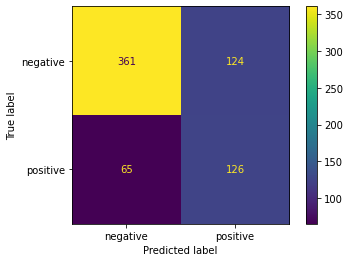

In [2]:
multiple_run(baseline.build_model, use_only=("token", ), name="Emb(token)")

# Multiple-Features

## Training

In [ ]:
multiple_run(
    baseline.build_model,
    use_only=("token", "lemma", "tense", "case", "gend", "numb"),
    name="Emb(multi)"
)

# CNN Multiple Features

## Training

In [ ]:
multiple_run(
    baseline.build_model_cnn,
    use_only=("token", "lemma", "tense", "case", "gend", "numb"),
    name="CNN(multi)"
)

# RNN Multiple Features

## Training

In [ ]:
from seligator.models import simple_rnn

multiple_run(
    simple_rnn.build_model,
    use_only=("token", "lemma", "tense", "case", "gend", "numb"),
    name="RNN(multi)")

# RNN No Token

## Training

In [ ]:
from seligator.models import simple_rnn

if False: # Does not work right now
    multiple_run(
        simple_rnn.build_model,
        use_only=("lemma", "tense", "case", "gend", "numb"),
        name="RNN(multi-no-tok)")

# RNN Char Level

## Training

In [ ]:
from seligator.models import char_based

multiple_run(
    char_based.build_model,
    use_only=("token", "lemma", "tense", "case", "gend", "numb", "token_char"),
    name="RNN(char+multi)")

tabulate.tabulate(
    Results, 
    headers={k:k for k in Results[0].keys()}, tablefmt="html", floatfmt="0.2f")

# Bert

## Training

In [ ]:
from seligator.models import bert

multiple_run(
    bert.build_model,
    use_only=("token_subword", ),
    name="BERT(simple)")

tabulate.tabulate(
    Results, 
    headers={k:k for k in Results[0].keys()}, tablefmt="html", floatfmt="0.2f")

# Summary

In [ ]:
print(
tabulate.tabulate(
    Results, 
    headers={k:k for k in Results[0].keys()}, tablefmt="github", floatfmt="0.2f"))

tabulate.tabulate(
    Results, 
    headers={k:k for k in Results[0].keys()}, tablefmt="html", floatfmt="0.2f")